In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('DivisionalStandings.csv')

In [3]:
df.head()

,ATLANTIC,GP,W,L,OTL,PTS,EAST,ATL,MET,WEST,PAC,CEN,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,BOSBoston Bruins,40,32,4,4,68,17-3-2,6-3-2,11-0-0,15-1-2,7-0-2,8-1-0,NaN,NaN,NaN
1,TORToronto Maple Leafs,41,25,9,7,57,14-4-3,6-1-1,8-3-2,11-5-4,5-3-3,6-2-1,NaN,NaN,NaN
2,TBTampa Bay Lightning,38,24,13,1,49,14-9-1,8-5-0,6-4-1,10-4-0,4-2-0,6-2-0,NaN,NaN,NaN
3,BUFBuffalo Sabres,37,20,15,2,42,9-10-2,6-7-1,3-3-1,10-5-0,6-3-0,4-2-0,NaN,NaN,NaN
4,FLAFlorida Panthers,41,18,19,4,40,13-10-1,6-3-1,7-7-0,5-9-3,4-4-2,1-5-1,NaN,NaN,NaN


In [4]:
# Filter out unknown columns

df = df.iloc[:, :12]
df.head(10)

,ATLANTIC,GP,W,L,OTL,PTS,EAST,ATL,MET,WEST,PAC,CEN
0,BOSBoston Bruins,40,32,4,4,68,17-3-2,6-3-2,11-0-0,15-1-2,7-0-2,8-1-0
1,TORToronto Maple Leafs,41,25,9,7,57,14-4-3,6-1-1,8-3-2,11-5-4,5-3-3,6-2-1
2,TBTampa Bay Lightning,38,24,13,1,49,14-9-1,8-5-0,6-4-1,10-4-0,4-2-0,6-2-0
3,BUFBuffalo Sabres,37,20,15,2,42,9-10-2,6-7-1,3-3-1,10-5-0,6-3-0,4-2-0
4,FLAFlorida Panthers,41,18,19,4,40,13-10-1,6-3-1,7-7-0,5-9-3,4-4-2,1-5-1
5,DETDetroit Red Wings,38,16,15,7,39,11-12-3,4-8-2,7-4-1,5-3-4,2-2-2,3-1-2
6,OTTOttawa Senators,39,18,18,3,39,11-9-2,6-5-0,5-4-2,7-9-1,4-6-0,3-3-1
7,MTLMontreal Canadiens,40,16,21,3,35,7-11-0,3-6-0,4-5-0,9-10-3,4-5-1,5-5-2
8,METROPOLITAN,GP,W,L,OTL,PTS,EAST,ATL,MET,WEST,PAC,CEN
9,CARCarolina Hurricanes,40,25,8,7,57,14-4-2,4-2-1,10-2-1,11-4-5,7-1-2,4-3-3


In [5]:
print(df[df['ATLANTIC'] == 'CENTRAL'].index)
print(df[df['ATLANTIC'] == 'PACIFIC'].index)

Int64Index([17], dtype='int64')
Int64Index([26], dtype='int64')


In [6]:
# Drop indexes where the rows are the divisional names

df = df.drop([8,17,26], axis=0)

In [7]:
df = df.reset_index()
df = df.drop(['index'], axis=1)
df.head(10)

,ATLANTIC,GP,W,L,OTL,PTS,EAST,ATL,MET,WEST,PAC,CEN
0,BOSBoston Bruins,40,32,4,4,68,17-3-2,6-3-2,11-0-0,15-1-2,7-0-2,8-1-0
1,TORToronto Maple Leafs,41,25,9,7,57,14-4-3,6-1-1,8-3-2,11-5-4,5-3-3,6-2-1
2,TBTampa Bay Lightning,38,24,13,1,49,14-9-1,8-5-0,6-4-1,10-4-0,4-2-0,6-2-0
3,BUFBuffalo Sabres,37,20,15,2,42,9-10-2,6-7-1,3-3-1,10-5-0,6-3-0,4-2-0
4,FLAFlorida Panthers,41,18,19,4,40,13-10-1,6-3-1,7-7-0,5-9-3,4-4-2,1-5-1
5,DETDetroit Red Wings,38,16,15,7,39,11-12-3,4-8-2,7-4-1,5-3-4,2-2-2,3-1-2
6,OTTOttawa Senators,39,18,18,3,39,11-9-2,6-5-0,5-4-2,7-9-1,4-6-0,3-3-1
7,MTLMontreal Canadiens,40,16,21,3,35,7-11-0,3-6-0,4-5-0,9-10-3,4-5-1,5-5-2
8,CARCarolina Hurricanes,40,25,8,7,57,14-4-2,4-2-1,10-2-1,11-4-5,7-1-2,4-3-3
9,NJNew Jersey Devils,40,25,12,3,53,15-10-2,8-5-0,7-5-2,10-2-1,7-0-0,3-2-1


In [8]:
def TeamAcronyms():
    
    # Instantiate an empty list
    Acronym = []

    # Construct conditional for-loop
    for i in range(len(df['ATLANTIC'])):
        # For teams with 3 Letter Acronyms, append to list
        if df['ATLANTIC'][i][3].isupper():
            Acronym.append(df['ATLANTIC'][i][:3])
        else:
            # For teams with 2 Letter Acronyms, append to list
            Acronym.append(df['ATLANTIC'][i][:2])
    
    return Acronym

In [9]:
# Replace name formatting with Team Acronyms

df['ATLANTIC'] = TeamAcronyms()

In [10]:
type(df['EAST'][0])

str

In [11]:
# Create new columns with the wins, losses and OT losses split and separated

df[['East Wins', 'East Losses', 'East OTL']] = df['EAST'].str.split('-', n=3, expand=True)
df[['West Wins', 'West Losses', 'West OTL']] = df['WEST'].str.split('-', n=3, expand=True)
df[['Atlantic Wins', 'Atlantic Losses', 'Atlantic OTL']] = df['ATL'].str.split('-', n=3, expand=True)
df[['Metro Wins', 'Metro Losses', 'Metro OTL']] = df['MET'].str.split('-', n=3, expand=True)
df[['Pacific Wins', 'Pacific Losses', 'Pacific OTL']] = df['PAC'].str.split('-', n=3, expand=True)
df[['Central Wins', 'Central Losses', 'Central OTL']] = df['CEN'].str.split('-', n=3, expand=True)

In [12]:
df.columns

Index(['ATLANTIC', 'GP', 'W', 'L', 'OTL', 'PTS', 'EAST', 'ATL', 'MET', 'WEST',
       'PAC', 'CEN', 'East Wins', 'East Losses', 'East OTL', 'West Wins',
       'West Losses', 'West OTL', 'Atlantic Wins', 'Atlantic Losses',
       'Atlantic OTL', 'Metro Wins', 'Metro Losses', 'Metro OTL',
       'Pacific Wins', 'Pacific Losses', 'Pacific OTL', 'Central Wins',
       'Central Losses', 'Central OTL'],
      dtype='object')

In [13]:
# drop redundant old columns

df.drop(['EAST', 'ATL', 'MET', 'WEST', 'PAC', 'CEN'], axis=1, inplace=True)

In [14]:
print(df.shape)

(32, 24)


In [15]:
df.iloc[:, 1:24] = df.iloc[:, 1:24].astype(int)

In [16]:
df.iloc[:8][['ATLANTIC', 'W', 'L', 'OTL', 'Atlantic Wins', 'Metro Wins', 'Pacific Wins', 'Central Wins']]

,ATLANTIC,W,L,OTL,Atlantic Wins,Metro Wins,Pacific Wins,Central Wins
0,BOS,32,4,4,6,11,7,8
1,TOR,25,9,7,6,8,5,6
2,TB,24,13,1,8,6,4,6
3,BUF,20,15,2,6,3,6,4
4,FLA,18,19,4,6,7,4,1
5,DET,16,15,7,4,7,2,3
6,OTT,18,18,3,6,5,4,3
7,MTL,16,21,3,3,4,4,5


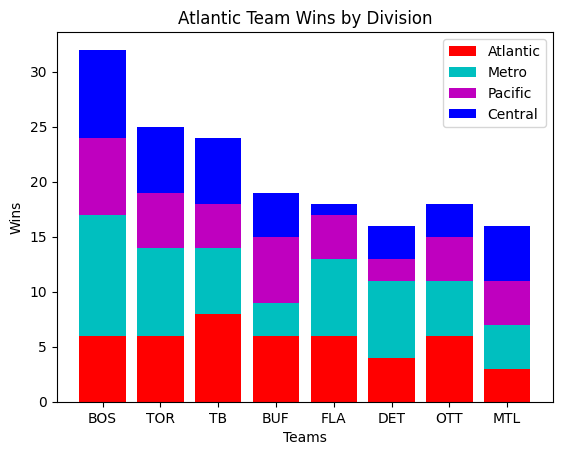

In [17]:
x = df.iloc[:8]['ATLANTIC']
y1 = df.iloc[:8]['Atlantic Wins']
y2 = df.iloc[:8]['Metro Wins']
y3 = df.iloc[:8]['Pacific Wins']
y4 = df.iloc[:8]['Central Wins']

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='c')
plt.bar(x, y3, bottom=y1+y2, color='m')
plt.bar(x, y4, bottom=y1+y2+y3, color='b')
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.legend(['Atlantic', 'Metro', 'Pacific', 'Central'])
plt.title('Atlantic Team Wins by Division')
plt.show()

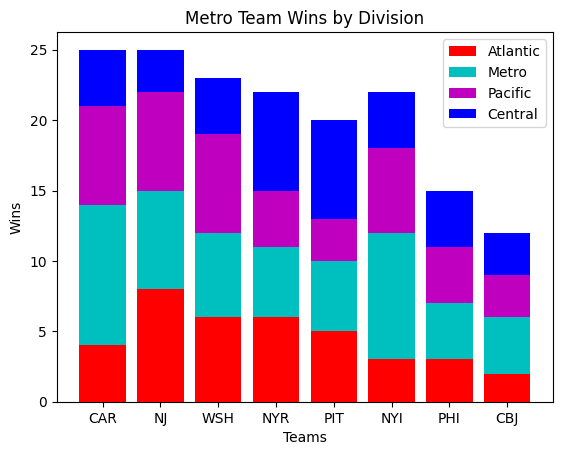

In [18]:
x = df.iloc[8:16]['ATLANTIC']
y1 = df.iloc[8:16]['Atlantic Wins']
y2 = df.iloc[8:16]['Metro Wins']
y3 = df.iloc[8:16]['Pacific Wins']
y4 = df.iloc[8:16]['Central Wins']

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='c')
plt.bar(x, y3, bottom=y1+y2, color='m')
plt.bar(x, y4, bottom=y1+y2+y3, color='b')
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.legend(['Atlantic', 'Metro', 'Pacific', 'Central'])
plt.title('Metro Team Wins by Division')
plt.show()

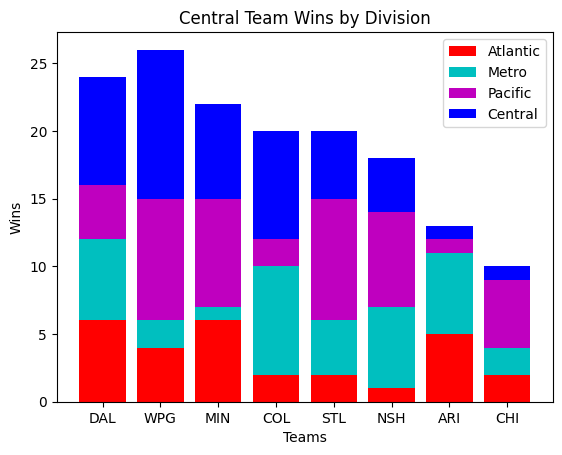

In [19]:
x = df.iloc[16:24]['ATLANTIC']
y1 = df.iloc[16:24]['Atlantic Wins']
y2 = df.iloc[16:24]['Metro Wins']
y3 = df.iloc[16:24]['Pacific Wins']
y4 = df.iloc[16:24]['Central Wins']

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='c')
plt.bar(x, y3, bottom=y1+y2, color='m')
plt.bar(x, y4, bottom=y1+y2+y3, color='b')
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.legend(['Atlantic', 'Metro', 'Pacific', 'Central'])
plt.title('Central Team Wins by Division')
plt.show()

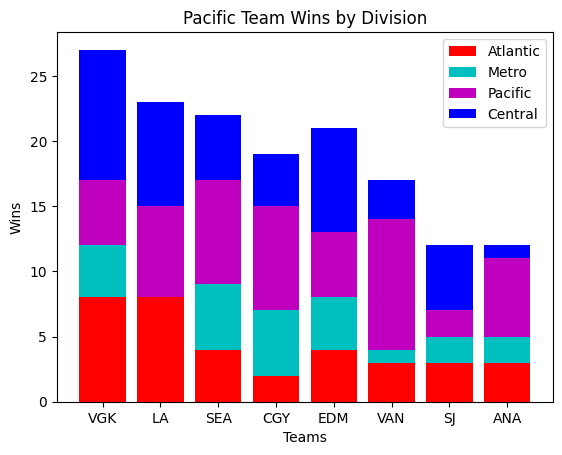

In [20]:
x = df.iloc[24:32]['ATLANTIC']
y1 = df.iloc[24:32]['Atlantic Wins']
y2 = df.iloc[24:32]['Metro Wins']
y3 = df.iloc[24:32]['Pacific Wins']
y4 = df.iloc[24:32]['Central Wins']

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='c')
plt.bar(x, y3, bottom=y1+y2, color='m')
plt.bar(x, y4, bottom=y1+y2+y3, color='b')
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.legend(['Atlantic', 'Metro', 'Pacific', 'Central'])
plt.title('Pacific Team Wins by Division')
plt.show()

In [21]:
# Get Winning percentage for each team from each division

df['Atlantic W%'] = df['Atlantic Wins'] / (df['Atlantic Wins'] + df['Atlantic Losses'] + df['Atlantic OTL'])
df['Metro W%'] = df['Metro Wins'] / (df['Metro Wins'] + df['Metro Losses'] + df['Metro OTL'])
df['Pacific W%'] = df['Pacific Wins'] / (df['Pacific Wins'] + df['Pacific Losses'] + df['Pacific OTL'])
df['Central W%'] = df['Central Wins'] / (df['Central Wins'] + df['Central Losses'] + df['Central OTL'])

In [22]:
win_percentages = df[['ATLANTIC', 'Atlantic W%', 'Metro W%', 'Pacific W%', 'Central W%']]

In [38]:
win_percentages.describe()

,Atlantic W%,Metro W%,Pacific W%,Central W%
count,32.000000,32.000000,32.000000,32.000000
mean,0.464610,0.475596,0.535118,0.511049
std,0.179404,0.201068,0.189237,0.223626
min,0.166667,0.000000,0.125000,0.083333
25%,0.325000,0.333333,0.400000,0.390909
50%,0.428571,0.477273,0.535897,0.500000
75%,0.600000,0.617788,0.666667,0.666667
max,0.800000,1.000000,1.000000,1.000000


/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_80429/1848417511.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y = win_percentages.mean()


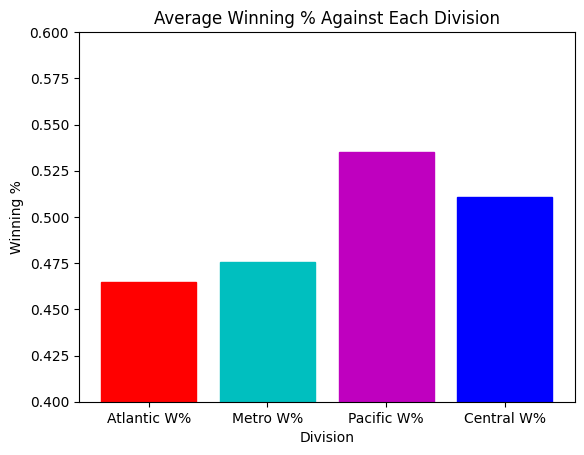

In [51]:
# Plot average Winning % for each division

x = ['Atlantic W%', 'Metro W%', 'Pacific W%', 'Central W%']
y = win_percentages.mean()

barlist = plt.bar(x, y)
barlist[0].set_color('r')
barlist[1].set_color('c')
barlist[2].set_color('m')
barlist[3].set_color('b')
plt.ylim(0.4, 0.6)
plt.xlabel('Division')
plt.ylabel('Winning %')
plt.title('Average Winning % Against Each Division')
plt.show()

In [52]:
df.head()

,ATLANTIC,GP,W,L,OTL,PTS,East Wins,East Losses,East OTL,West Wins,...,Pacific Wins,Pacific Losses,Pacific OTL,Central Wins,Central Losses,Central OTL,Atlantic W%,Metro W%,Pacific W%,Central W%
0,BOS,40,32,4,4,68,17,3,2,15,...,7,0,2,8,1,0,0.545455,1.000000,0.777778,0.888889
1,TOR,41,25,9,7,57,14,4,3,11,...,5,3,3,6,2,1,0.750000,0.615385,0.454545,0.666667
2,TB,38,24,13,1,49,14,9,1,10,...,4,2,0,6,2,0,0.615385,0.545455,0.666667,0.750000
3,BUF,37,20,15,2,42,9,10,2,10,...,6,3,0,4,2,0,0.428571,0.428571,0.666667,0.666667
4,FLA,41,18,19,4,40,13,10,1,5,...,4,4,2,1,5,1,0.600000,0.500000,0.400000,0.142857


In [56]:
# Get the Pts% for every team against each division

df['Atlantic Pts%'] = (df['Atlantic Wins']*2 + df['Atlantic OTL']) / ((df['Atlantic Wins'] + df['Atlantic Losses'] + df['Atlantic OTL'])*2)
df['Metro Pts%'] = (df['Metro Wins']*2 + df['Metro OTL']) / ((df['Metro Wins'] + df['Metro Losses'] + df['Metro OTL'])*2)
df['Pacific Pts%'] = (df['Pacific Wins']*2 + df['Pacific OTL']) / ((df['Pacific Wins'] + df['Pacific Losses'] + df['Pacific OTL'])*2)
df['Central Pts%'] = (df['Central Wins']*2 + df['Central OTL']) / ((df['Central Wins'] + df['Central Losses'] + df['Central OTL'])*2)

In [59]:
pts_percentages = df[['ATLANTIC', 'Atlantic Pts%', 'Metro Pts%', 'Pacific Pts%', 'Central Pts%']]
pts_percentages.describe()

,Atlantic Pts%,Metro Pts%,Pacific Pts%,Central Pts%
count,32.000000,32.000000,32.000000,32.000000
mean,0.518496,0.514409,0.597775,0.572540
std,0.174552,0.195226,0.179681,0.202978
min,0.166667,0.083333,0.187500,0.136364
25%,0.355357,0.389286,0.500000,0.456250
50%,0.519231,0.520833,0.620192,0.588542
75%,0.644643,0.635417,0.682005,0.711806
max,0.812500,1.000000,1.000000,1.000000


/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_80429/3236179004.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y = pts_percentages.mean()


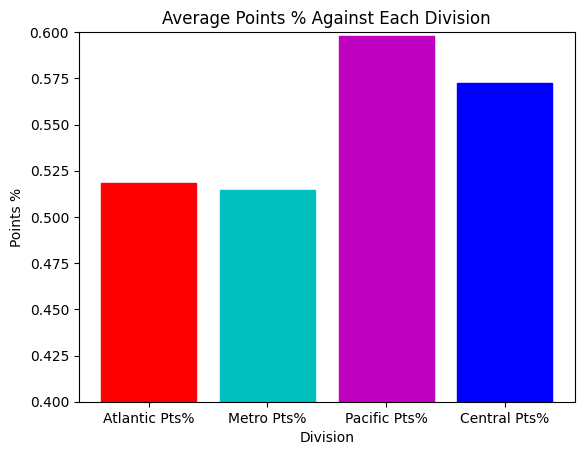

In [62]:
# Plot average Points % for each division

x = ['Atlantic Pts%', 'Metro Pts%', 'Pacific Pts%', 'Central Pts%']
y = pts_percentages.mean()

barlist = plt.bar(x, y)
barlist[0].set_color('r')
barlist[1].set_color('c')
barlist[2].set_color('m')
barlist[3].set_color('b')
plt.ylim(0.4, 0.6)
plt.xlabel('Division')
plt.ylabel('Points %')
plt.title('Average Points % Against Each Division')
plt.show()